   Animal          ID  Frame       Width      Length  Height_Centroid  \
0      14  1734629593      0  141.421356  431.335137        1188.7141   
1      14  1734629593      1  148.973152  438.744801        1226.3433   
2      14  1734629593      2  152.069063  436.152496        1188.2642   
3      14  1734629593      3  152.236658  440.432742        3060.0000   
4      14  1734629593      4  146.154028  439.447380        3060.0000   

   Height_average        Volume  Real  
0     1329.344737  6.338449e+07   360  
1     1369.597578  6.651040e+07   360  
2     1419.839002  6.967576e+07   360  
3     1433.805157  7.095902e+07   360  
4     1450.680147  7.104996e+07   360  


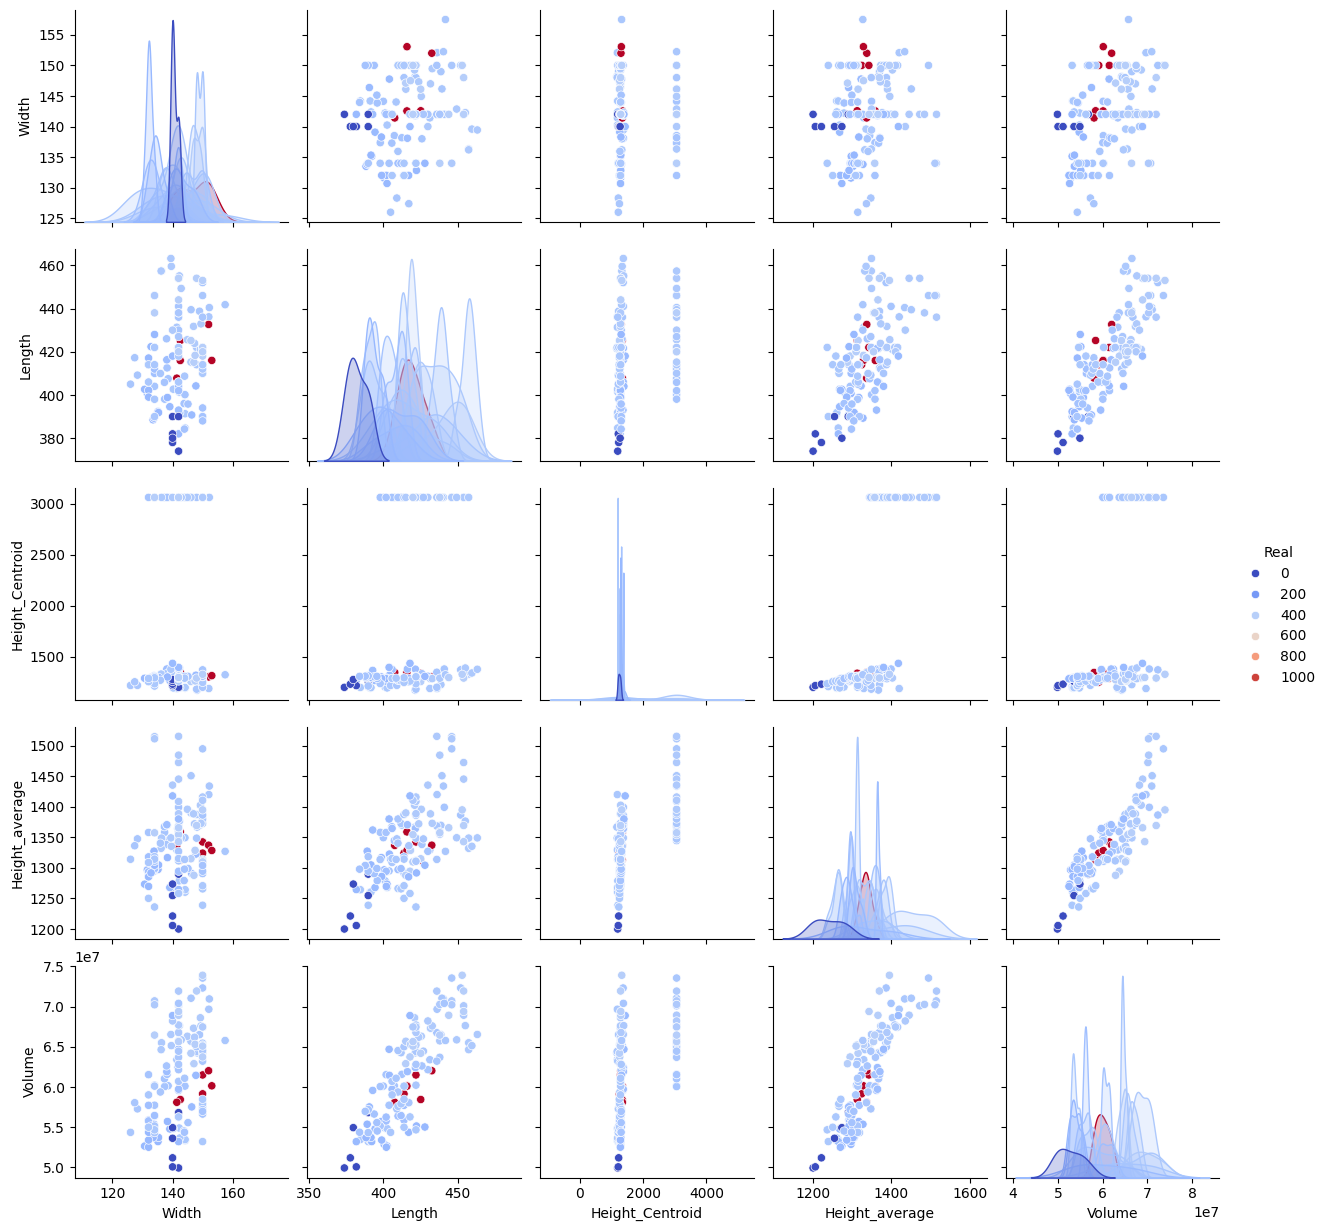

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("datasets/mydataset.csv")

# Exibir as primeiras linhas do dataset
print(df.head())




# Criar um pairplot para ver correlações
sns.pairplot(df.iloc[:, 3:], hue="Real", palette="coolwarm")
plt.show()


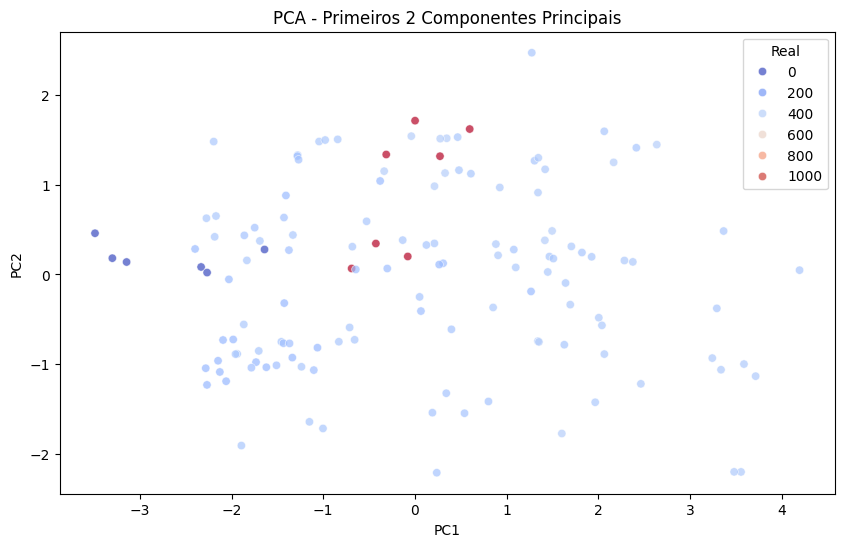

Variância explicada pelo PC1: 60.22%
Variância explicada pelo PC2: 19.87%
Variância total explicada: 80.09%


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
df = pd.read_csv("datasets/mydataset.csv")

# Selecionar apenas as colunas numéricas para o PCA
features = ["Width", "Length", "Height_Centroid", "Height_average", "Volume"]
X = df[features]

# Padronizar os dados (PCA funciona melhor com dados normalizados)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)  # Reduzindo para 2 dimensões
X_pca = pca.fit_transform(X_scaled)

# Criar um novo DataFrame com os componentes principais
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Real"] = df["Real"]  # Adicionando a variável Real para visualização

# Plotar os componentes principais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Real"], palette="coolwarm", alpha=0.7)
plt.title("PCA - Primeiros 2 Componentes Principais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Mostrar a variância explicada
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada pelo PC1: {explained_variance[0]:.2%}")
print(f"Variância explicada pelo PC2: {explained_variance[1]:.2%}")
print(f"Variância total explicada: {sum(explained_variance):.2%}")


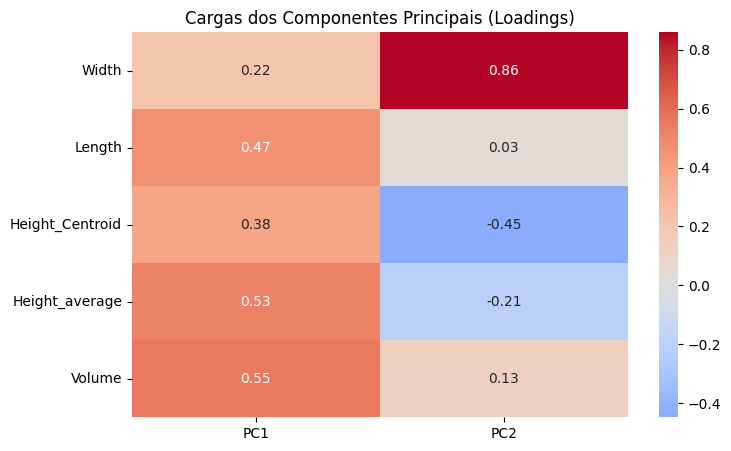

In [4]:
# Criar um DataFrame com as cargas dos PCs
loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2"], index=features)

# Plotar um heatmap para visualizar a importância de cada variável nos componentes principais
plt.figure(figsize=(8, 5))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Cargas dos Componentes Principais (Loadings)")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Criar dataset reduzido com os componentes principais
X_pca = df_pca[["PC1", "PC2"]]
y = df_pca["Real"]  # Variável target

# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [6]:
# Inicializar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)


In [1]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('datasets/mydataset.csv')

# Verificar as primeiras linhas dos dados
print(df.head())


   Animal          ID  Frame       Width      Length  Height_Centroid  \
0      14  1734629593      0  141.421356  431.335137        1188.7141   
1      14  1734629593      1  148.973152  438.744801        1226.3433   
2      14  1734629593      2  152.069063  436.152496        1188.2642   
3      14  1734629593      3  152.236658  440.432742        3060.0000   
4      14  1734629593      4  146.154028  439.447380        3060.0000   

   Height_average        Volume  Real  
0     1329.344737  6.338449e+07   360  
1     1369.597578  6.651040e+07   360  
2     1419.839002  6.967576e+07   360  
3     1433.805157  7.095902e+07   360  
4     1450.680147  7.104996e+07   360  


In [2]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Ver a matriz de correlação
print(correlation_matrix)


                   Animal        ID     Frame     Width    Length  \
Animal           1.000000  0.994300 -0.002742 -0.124608  0.129244   
ID               0.994300  1.000000 -0.001317 -0.114530  0.109104   
Frame           -0.002742 -0.001317  1.000000  0.163418  0.118960   
Width           -0.124608 -0.114530  0.163418  1.000000  0.183349   
Length           0.129244  0.109104  0.118960  0.183349  1.000000   
Height_Centroid  0.166948  0.162825 -0.012873  0.070141  0.305155   
Height_average   0.130790  0.125819  0.200350  0.179738  0.634231   
Volume           0.173851  0.163550  0.206069  0.426133  0.823736   
Real            -0.230645 -0.228261  0.063741  0.246485  0.238568   

                 Height_Centroid  Height_average    Volume      Real  
Animal                  0.166948        0.130790  0.173851 -0.230645  
ID                      0.162825        0.125819  0.163550 -0.228261  
Frame                  -0.012873        0.200350  0.206069  0.063741  
Width                   0

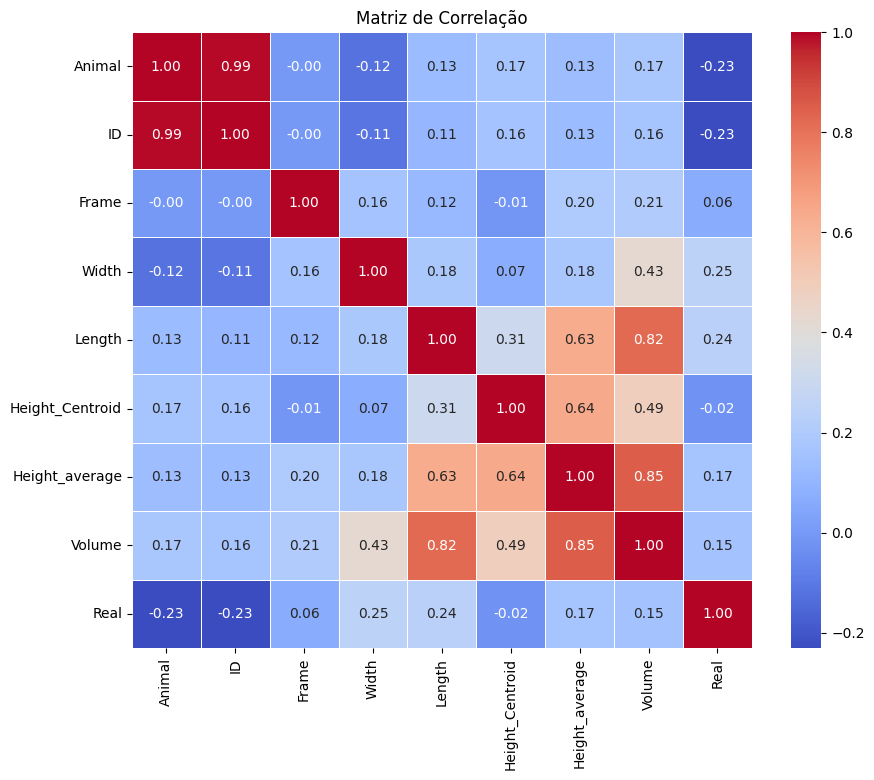

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()
